In [3]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
dataset = './Rice_Image_Dataset/'
images = []
class_name = []
list_name = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

for i, rice_type in enumerate(os.listdir(dataset)):
    for j, file_name in enumerate(os.listdir(os.path.join(dataset, rice_type))):
        img = load_img(os.path.join(dataset, rice_type, file_name))
        img = img_to_array(img)
        img = tf.image.rgb_to_grayscale(img)
        img = img / 255
        class_name.append(i)
        images.append(img)
        if j > 1000:
            break
        # print('file name:', file_name, 'from type:', rice_type)

In [5]:
y = tf.keras.utils.to_categorical(class_name,num_classes=len(list_name))

In [6]:
images = np.asarray(images)

x_train, x_temp,y_train,y_temp = train_test_split(images,y,test_size = 0.2, random_state=69)
x_test, x_val,y_test, y_val = train_test_split(x_temp,y_temp, test_size=0.5, random_state=69)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='relu', input_shape=(250,250,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='relu', input_shape=(250,250,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28,activation='relu'),
    tf.keras.layers.Dense(14,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax'),
])

c:\Github\deep-learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 250, 250, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 250, 250, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 500000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │    14,000,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │           406 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,010,077 (53.44 MB)

 Trainable params: 14,010,077 (53.44 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    validation_data=(x_val,y_val),
    callbacks = [early_stop]
)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 57s 444ms/step - accuracy: 0.8745 - loss: 0.3228 - val_accuracy: 0.9601 - val_loss: 0.1213
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 58s 462ms/step - accuracy: 0.9780 - loss: 0.0664 - val_accuracy: 0.9681 - val_loss: 0.0678
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 57s 456ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9681 - val_loss: 0.0891
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 478ms/step - accuracy: 0.9918 - loss: 0.0220 - val_accuracy: 0.9721 - val_loss: 0.0914
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 479ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9721 - val_loss: 0.0840


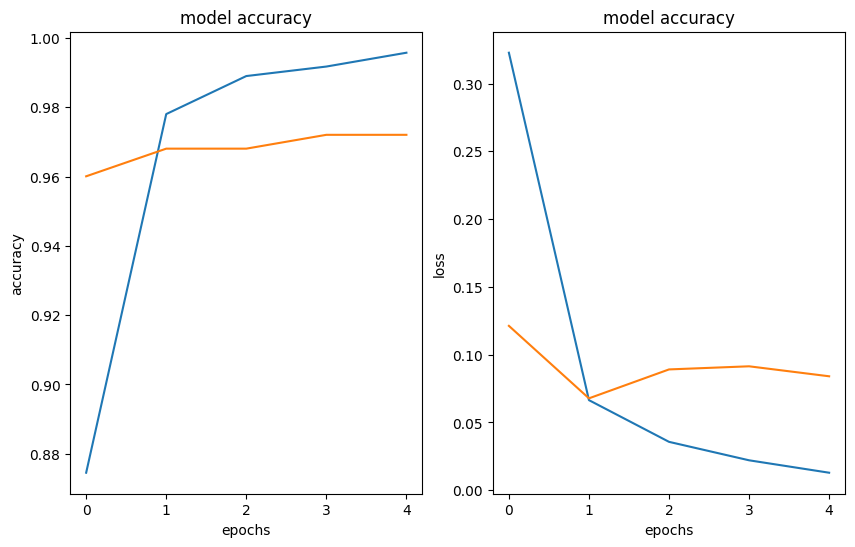

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()